# **Data Preprocessing and Exploratory Data Analysis (EDA)**

# **Import the necessary python libraries for EDA**

In [1]:
# Preprocessing Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Normalization Library
from sklearn.preprocessing import MinMaxScaler

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Choose a Dataset**


We are using the Titanic dataset, which is commonly used for EDA and is available on Kaggle.

https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download

# **Step 2: Data Preprocessing**


**Load the Dataset:** Use pandas to read the dataset.

In [2]:
df = pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Handle Missing Values:** Identify and address missing values. You can either remove rows with missing values or fill them using techniques like mean imputation.

In [5]:
# Step 1: Identify Missing Values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Step 2: Handle Missing Values
# Numerical: Age
# Categorical: Cabin, Embarked

In [7]:
# Numerical Features Imputation
num_features = ['Age', 'Fare']
num_imputer = SimpleImputer(strategy='mean')  # You can also use 'median'
df[num_features] = num_imputer.fit_transform(df[num_features])

In [8]:
# Categorical Features Imputation
cat_features = ['Embarked', 'Cabin']
cat_imputer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical data
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [9]:
# Step 3: Check once again to confirm the missing values are handled
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Normalize Data:** Normalize numerical features if necessary to ensure they are on a similar scale.

In [10]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

**Convert Categorical Variables:** Convert categorical variables into numerical format using one-hot encoding or label encoding.

In [11]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [12]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Name', 'Ticket', 'Cabin'], dtype='object')


In [13]:
df_prev=df.copy()
df=df.drop('Name', axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.271174,1,0,A/5 21171,0.014151,B96 B98,False,True,False,False,True
1,2,1,1,0.472229,1,0,PC 17599,0.139136,C85,True,False,True,False,False
2,3,1,3,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,True,False,False,False,True
3,4,1,1,0.434531,1,0,113803,0.103644,C123,True,False,False,False,True
4,5,0,3,0.434531,0,0,373450,0.015713,B96 B98,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.334004,0,0,211536,0.025374,B96 B98,False,True,False,False,True
887,888,1,1,0.233476,0,0,112053,0.058556,B42,True,False,False,False,True
888,889,0,3,0.367921,1,2,W./C. 6607,0.045771,B96 B98,True,False,False,False,True
889,890,1,1,0.321438,0,0,111369,0.058556,C148,False,True,True,False,False


In [14]:
df_prev

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,B96 B98,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.103644,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,0.015713,B96 B98,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.334004,0,0,211536,0.025374,B96 B98,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0.233476,0,0,112053,0.058556,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.367921,1,2,W./C. 6607,0.045771,B96 B98,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0.321438,0,0,111369,0.058556,C148,False,True,True,False,False


In [15]:
non_numeric_cols=list(non_numeric_cols)[1:]

In [16]:
# Convert categorical variables to numeric codes
for col in non_numeric_cols:
    df[col] = pd.factorize(df[col])[0]

In [17]:
# Re-check for non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


# **Step 3: Exploratory Data Analysis (EDA)**

**Basic Information:** Get an overview of the dataset's structure, including the shape and data types.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int64  
 9   Sex_female   891 non-null    bool   
 10  Sex_male     891 non-null    bool   
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 67.1 KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.367921,0.523008,0.381594,306.859708,0.062858,15.101010
std,257.353842,0.486592,0.836071,0.163383,1.102743,0.806057,197.286045,0.096995,34.529013
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.271174,0.000000,0.000000,135.000000,0.015440,0.000000
50%,446.000000,0.000000,3.000000,0.367921,0.000000,0.000000,285.000000,0.028213,0.000000
75%,668.500000,1.000000,3.000000,0.434531,1.000000,0.000000,474.500000,0.060508,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,680.000000,1.000000,146.000000


**Visualizations:** Use libraries like Matplotlib and Seaborn to create visualizations that reveal insights.

Histograms for distribution of numerical features:

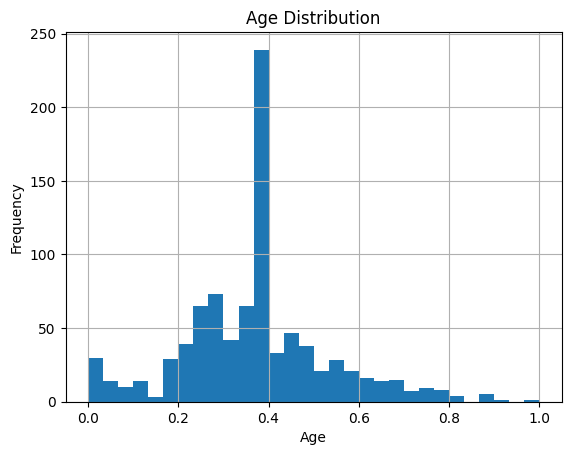

In [20]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Count Plots for categorical features:

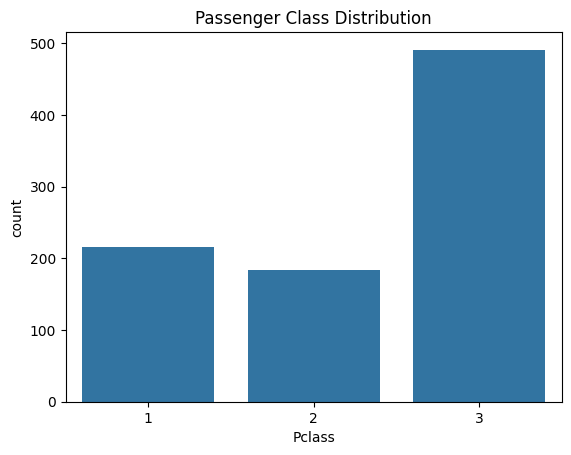

In [21]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

**Correlation Analysis:** Identify relationships between variables using a correlation matrix.

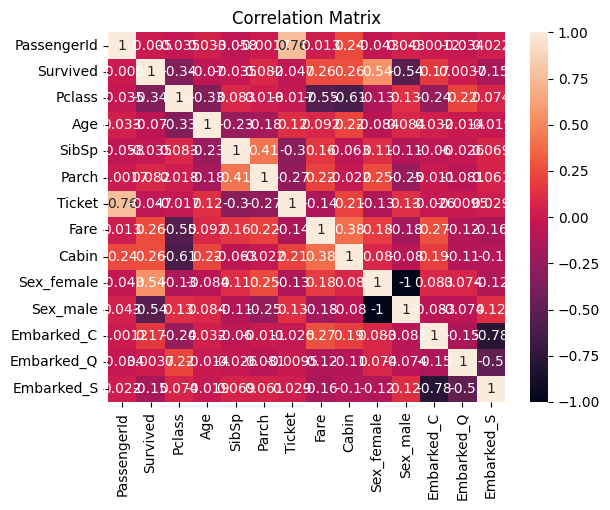

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Conclusion based on EDA of the Titanic dataset**

**Data Preprocessing:**
- Successfully handled missing values in 'Age', 'Fare', 'Embarked', and 'Cabin' columns using imputation.
- Normalized 'Age' and 'Fare' features using MinMaxScaler.
- Converted categorical features ('Sex', 'Embarked', and remaining non-numeric columns) into numerical representations.

**Exploratory Data Analysis:**
- Visualizations (histograms and count plots) provided insights into the distribution of key features like 'Age' and 'Pclass'.
- The correlation matrix revealed relationships between different features, which can be further investigated to understand potential dependencies.

**Further analysis and modeling steps:**
- Based on the correlation matrix, consider feature selection or engineering to improve model performance.
- Explore more advanced visualizations to further understand patterns and outliers in the data.
- Apply various machine learning models to predict survival based on the processed features.